In this tutorial we'll look at how to sample from the normal distribution, how to generate qq plots, and how to calculate calculate cumulative areas under the curve for both the normal and t-distributions (as well as the inverse functions) 

# Sampling from the normal distribution

The easiest way to sample from the normal distribution is using the [numpy random library](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). Sampling from a normal distribution can be useful for many different engineering applications for example Monte Carlo simluation (you don't need to know this now but I'm sure you'll hear about it later in your studies). In this case, we will use it to generate our data set. 

The method to sample the data takes three parameters. loc which is the mean, scale which is the standard deviation, and size which is the number of data points

In [1]:
import numpy as np
samples = np.random.normal(loc = 10, scale=2, size=100)
print("The first 10 samples: " + str(samples[0:10]))

The first 10 samples: [ 7.46658215 13.41195334  7.55991326  6.5508708  10.31607442 12.54784163
 11.90242231  5.79950879  9.55825733 13.26461228]


Since we're not working with a dataframe in this example we'll use the built in numpy functions to calcualte the mean and standard deviation of our sample. Note that this is a statistics, so we're unlikely to get back the population values (mean=10 and std=2) that we used to generate the samples.

In [2]:
mean = np.mean(samples)
std = np.std(samples)
print("Mean " + str(mean) + ", std: " + str(std))

Mean 9.880425617021594, std: 1.8652701776138376


# Testing for normally distributed data

In this case, we know that our data are normally distributed but in general we need to test that our data are actually normally distributed. We learned that a good way to do that was via qq plots. Let's plot this data on a qq plot. The method to plot the qq plots also takes loc and scale as the values. We'll use the ones calculated from our data set because in actuality we don't know the true population parameters. The additional parameter line='45' plots the y=x line on the same plot.

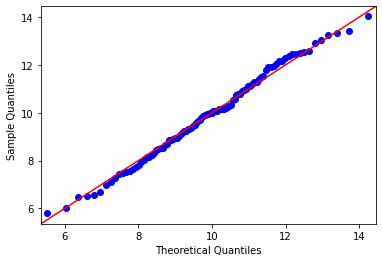

In [3]:
import statsmodels.graphics.gofplots as sm
import matplotlib.pyplot as plt
sm.qqplot(samples,line='45',loc=mean,scale=std)
plt.show()

As expected the data follows sample data and the theoretical data match up pretty well. They don't match up perfectly. Remember in the lectures we said that if we included the 95% confidence interals on the plot that even with normally distributed data we'd end up with 19/20 points out of the bounds!

# Calculating areas under the curves

Let's calculate some areas under the curves. In the first section we'll assume that the true population parameters are the same as for our samples (even though we know in this case that's not true). Let's calculate the probability of seeing a value >= 13. Let's first calculate the z value.

In [4]:
z = (13 - mean)/std
print(z)

1.6724517554712357


The [scipy.stats.normal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) library can then be used to calcualte the value of the cumulative distribution function.

In [5]:
from scipy.stats import norm
p_z = norm.cdf(z)
print(p_z)

0.9527823631620087


The scipy norm library can do the conversion to z for you. The default values are for a mean = 0 (loc) and std = 1 (scale).

In [6]:
p_x = norm.cdf(13, loc=mean, scale=std)
print(p_x)

0.9527823631620087


Now let's figure out the point below which 2/3 (67%) of the data lies.

In [7]:
# Get the z value
z = norm.ppf(0.67)
print(z)
# Unpack it back to the orignal units
x = z*std + mean
print(x)

0.4399131656732339
10.700982525691572


Again, instead of manually converting the z value back into the scale of the original distribution, we can just specify it when calling the ppf function.

In [8]:
x = norm.ppf(0.67, loc=mean,scale=std)
print(x)

10.700982525691572


Now let's pretend we don't know the mean of the population distribution and calculate 95% confidence intervals for it using our sampled data. In this case assume we also don't know the true standard deviation. In cases where we want to estimate the true population mean and are estimating the standard deviation we have to use the t-distribution to calculate our confidence intervals.
Remember the confidence interval for the true mean is $\bar{x} - \frac{c_t*s}{\sqrt(n)} <= \mu <=  \bar{x} - \frac{c_t*s}{\sqrt(n)}$.
We already calcualted $\bar{x}$ and $s$ and we took 100 samples so $n=100$. That also means that we have 99 degrees of freedom. Let's first calculate the $c_t$ values. This can be done using the [scipy.stats t library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html). Note that you CAN NOT specify loc and scale for the t-distribution because it only has one parameter, the degrees of freedom (DF).

In [9]:
from scipy.stats import t
ct = t.ppf(0.975,df=99)
print(ct)
LB = mean-ct*std/np.sqrt(100)
UB = mean+ct*std/np.sqrt(100)
print(str(LB) + " <= true mean <= " +str(UB))

1.9842169515086827
9.510315546465094 <= true mean <= 10.250535687578093


As we can see the 95% confidence interval we generated using our sample does contain the true mean of 10. Since we are calculating a 95% confidence interval, if we were to repeat this process 20 times and calculate the confidence intervals for all of those t, we would expect 19 of the confidence interval ranges to contain the true mean of 10.